# Stocks Price Prediction With LSTM

In [130]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import plotly.graph_objects as go

In [131]:
plt.style.use("fivethirtyeight")
%matplotlib inline

In [132]:
stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 8, 26)
df = yf.download(stock, start, end)

/tmp/ipykernel_11283/676154855.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [133]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.246151,35.098942,26.652758,28.784338,855215656
2007-10-08,30.595375,33.335977,30.403051,33.335977,126671715
2007-10-09,32.678883,32.967366,28.960638,30.611409,116725709
2007-10-10,32.983387,33.656518,32.694903,33.528301,67931378
2007-10-11,36.669579,38.464593,32.694906,38.464593,106320954


In [134]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-08-19,288.000000,290.100006,286.549988,290.000000,7196772
2025-08-20,288.399994,289.000000,286.950012,288.200012,3106073
2025-08-21,284.000000,289.549988,283.600006,288.399994,7389271
2025-08-22,283.350006,284.549988,281.799988,284.000000,6824793
2025-08-25,284.149994,284.600006,282.200012,283.350006,7426789


In [135]:
df.shape

(4410, 5)

In [136]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4410 entries, 2007-10-05 to 2025-08-25
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4410 non-null   float64
 1   (High, POWERGRID.NS)    4410 non-null   float64
 2   (Low, POWERGRID.NS)     4410 non-null   float64
 3   (Open, POWERGRID.NS)    4410 non-null   float64
 4   (Volume, POWERGRID.NS)  4410 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 206.7 KB


In [138]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4410.000000,4410.000000,4410.000000,4410.000000,4.410000e+03
mean,88.773294,89.910391,87.653905,88.814441,1.192109e+07
std,76.605943,77.489116,75.698593,76.603951,2.018606e+07
min,18.827005,20.125419,16.879385,20.028038,0.000000e+00
25%,36.533520,37.079253,36.024971,36.580624,4.923597e+06
50%,66.064487,67.042116,65.232704,66.055706,8.525476e+06
75%,97.373295,99.375563,95.972281,97.651241,1.376872e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [139]:
df = df.reset_index()


In [140]:
df.shape

(4410, 6)

In [141]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.246151,35.098942,26.652758,28.784338,855215656
1,2007-10-08,30.595375,33.335977,30.403051,33.335977,126671715
2,2007-10-09,32.678883,32.967366,28.960638,30.611409,116725709
3,2007-10-10,32.983387,33.656518,32.694903,33.528301,67931378
4,2007-10-11,36.669579,38.464593,32.694906,38.464593,106320954


In [142]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [143]:
df.to_csv("../datasets/powergrid.csv")

In [144]:
data = pd.read_csv("../datasets/powergrid.csv")
data.sample(10)

,Price,Date,Close,High,Low,Open,Volume
2400,2399,2017-07-06,78.89533996582031,79.32769356274129,78.5757724900818,79.32769356274129,5577232
3132,3131,2020-06-30,74.21536254882812,76.3800663313098,73.85457762558254,75.97683510703676,11889584
1709,1708,2014-09-10,49.48677444458008,49.65033404475699,48.61443685733278,48.61443685733278,5594235
3294,3293,2021-02-17,102.4938735961914,103.00623630754812,98.99647900880093,100.46672093452761,39034960
733,732,2010-09-28,35.61838912963867,35.70168749492172,35.18523717824425,35.3185159184648,3076594
781,780,2010-12-07,32.96949768066406,33.152752255003115,32.6862823682287,32.96949768066406,22324627
3590,3589,2022-05-02,149.420166015625,150.51717770776335,145.77419531249606,145.77419531249606,12634353
320,319,2009-01-23,27.997053146362305,28.337887196713925,26.747329028859,28.061973393725005,7005930
453,452,2009-08-11,36.35860824584961,36.76676494210607,35.67290411038203,36.76676494210607,2647345
22,21,2007-11-05,48.7699089050293,49.84371295595519,47.47172633089677,47.76021424575629,38833135


In [145]:
data.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.246150970458984,35.09894231308452,26.652757527018196,28.78433790489176,855215656
2,1,2007-10-08,30.595375061035156,33.33597671261278,30.403051299111347,33.33597671261278,126671715
3,2,2007-10-09,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,2007-10-10,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378


In [146]:
data.shape

(4411, 7)

In [147]:
# plotly plots
fig = go.Figure(
        data = [go.Candlestick(x=data["Date"],
        open = data["Open"],
        high = data["High"],
        low = data["Low"],
        close = data["Close"]
    )]
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [148]:
data.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.246150970458984,35.09894231308452,26.652757527018196,28.78433790489176,855215656
2,1,2007-10-08,30.595375061035156,33.33597671261278,30.403051299111347,33.33597671261278,126671715
3,2,2007-10-09,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,2007-10-10,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378


In [149]:
data = data.drop("Date", axis=1)

In [150]:
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,32.246150970458984,35.09894231308452,26.652757527018196,28.78433790489176,855215656
2,1,30.595375061035156,33.33597671261278,30.403051299111347,33.33597671261278,126671715
3,2,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378


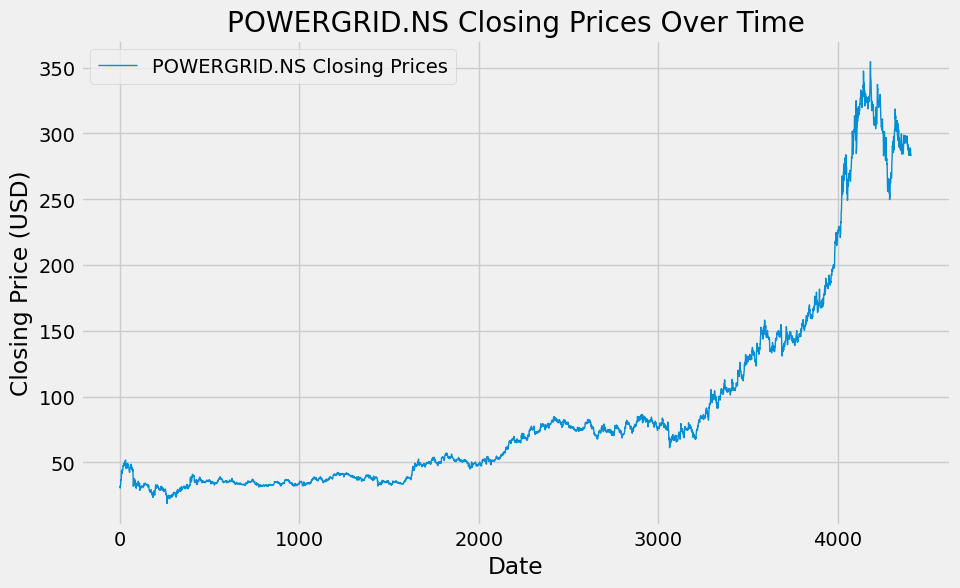

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(
    df["Close"],
    label = f"{stock} Closing Prices",
    linewidth = 1
)
plt.title(f"{stock} Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

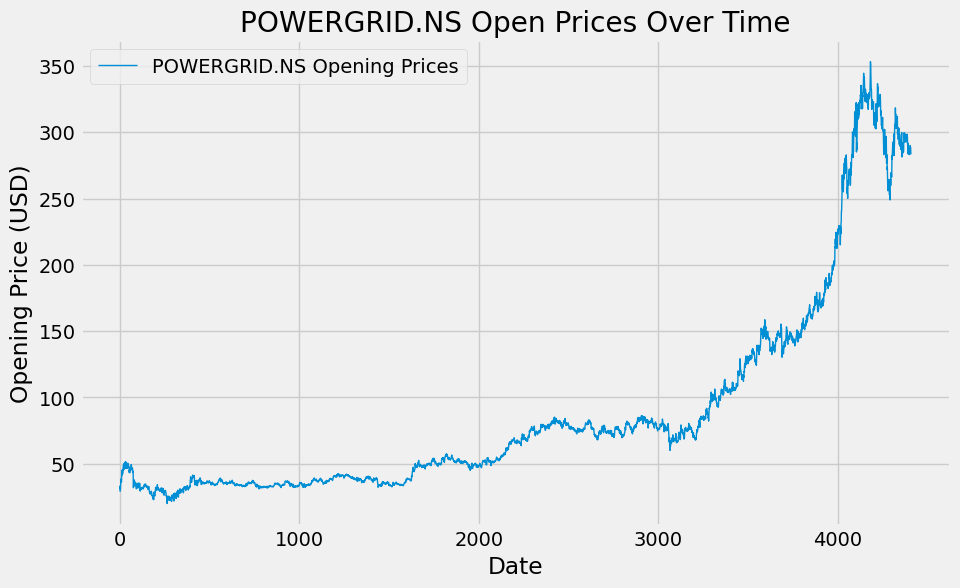

In [156]:
plt.figure(figsize=(10, 6))
plt.plot(
    df["Open"],
    label = f"{stock} Opening Prices",
    linewidth = 1
)
plt.title(f"{stock} Open Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Opening Price (USD)")
plt.legend()
plt.show()

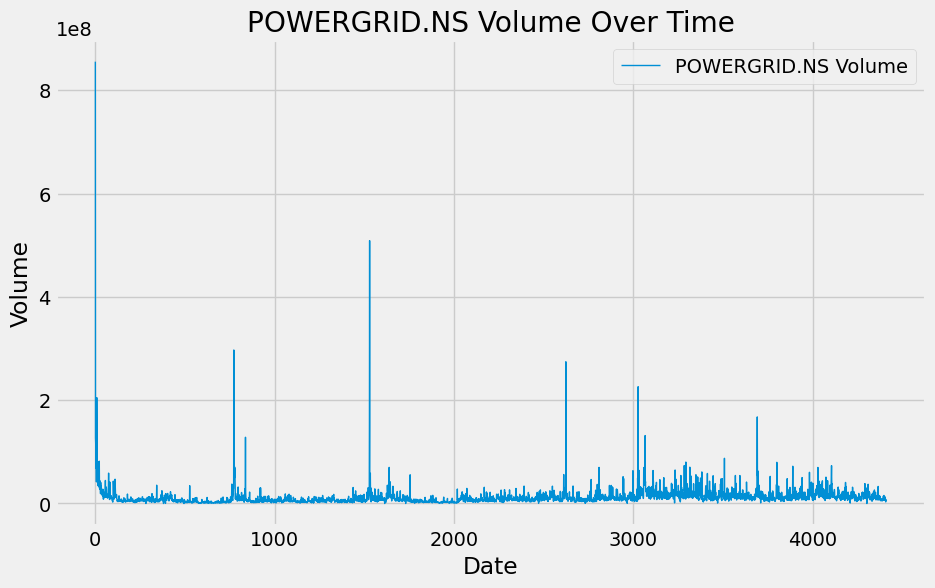

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(
    df["Volume"],
    label = f"{stock} Volume",
    linewidth = 1
)
plt.title(f"{stock} Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

In [158]:
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,32.246150970458984,35.09894231308452,26.652757527018196,28.78433790489176,855215656
2,1,30.595375061035156,33.33597671261278,30.403051299111347,33.33597671261278,126671715
3,2,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378


In [159]:
data = data.drop(0)
data.head()

,Price,Close,High,Low,Open,Volume
1,0,32.246150970458984,35.09894231308452,26.652757527018196,28.78433790489176,855215656
2,1,30.595375061035156,33.33597671261278,30.403051299111347,33.33597671261278,126671715
3,2,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,3,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378
5,4,36.669578552246094,38.464593373413685,32.69490567167493,38.464593373413685,106320954


In [160]:
data = data.drop("Price", axis=1)
data.head()

,Close,High,Low,Open,Volume
1,32.246150970458984,35.09894231308452,26.652757527018196,28.78433790489176,855215656
2,30.595375061035156,33.33597671261278,30.403051299111347,33.33597671261278,126671715
3,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
4,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378
5,36.669578552246094,38.464593373413685,32.69490567167493,38.464593373413685,106320954


In [161]:
data.shape

(4410, 5)

In [162]:
data = data.reset_index(drop=True)
data.head()

,Close,High,Low,Open,Volume
0,32.246150970458984,35.09894231308452,26.652757527018196,28.78433790489176,855215656
1,30.595375061035156,33.33597671261278,30.403051299111347,33.33597671261278,126671715
2,32.67888259887695,32.96736615216298,28.960638057695306,30.61140916310034,116725709
3,32.9833869934082,33.656518050021006,32.694903497024825,33.528301472014974,67931378
4,36.669578552246094,38.464593373413685,32.69490567167493,38.464593373413685,106320954


In [163]:
data.shape

(4410, 5)

In [164]:
data.tail()

,Close,High,Low,Open,Volume
4405,288.0,290.1000061035156,286.54998779296875,290.0,7196772
4406,288.3999938964844,289.0,286.95001220703125,288.20001220703125,3106073
4407,284.0,289.54998779296875,283.6000061035156,288.3999938964844,7389271
4408,283.3500061035156,284.54998779296875,281.79998779296875,284.0,6824793
4409,284.1499938964844,284.6000061035156,282.20001220703125,283.3500061035156,7426789


In [167]:
# moving average 100
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4405    294.718167
4406    294.704695
4407    294.648716
4408    294.539938
4409    294.490438
Name: Close, Length: 4410, dtype: float64

In [168]:
# moving average 200
ma200 = data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4405    294.486719
4406    294.383826
4407    294.247533
4408    294.101925
4409    293.992336
Name: Close, Length: 4410, dtype: float64

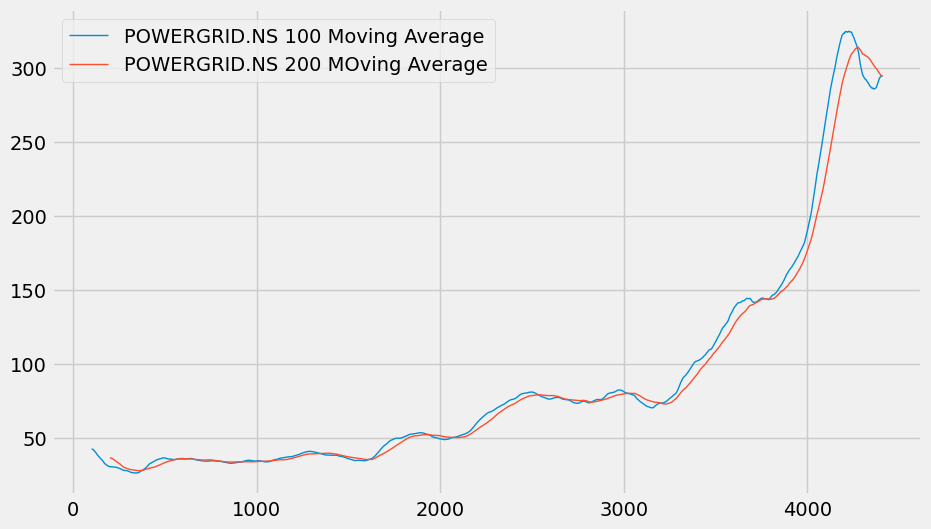

In [169]:
# plotting the 100 and 200 moving averages
plt.figure(figsize=(10, 6))
plt.plot(
    ma100,
    label = f"{stock} 100 Moving Average",
    linewidth = 1
)
plt.plot(
    ma200,
    label = f"{stock} 200 MOving Average",
    linewidth = 1
)
plt.legend()
plt.show()